# Mediciones de carbono 14 de una muestra

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.linalg import block_diag
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

El radiocarbono, o isotopo 14 del carbono (14C) se crea permanentemente
en la atmosfera, se incorpora a las plantas a traves de la fotosintesis y a los animales a traves de las plantas que ingieren. Una
vez que la planta o el animal muere, el 14C decae radioactivamente
siguiendo una ley exponencial decreciente. El archivo carbono14.csv
contiene datos simulados de la cantidad de 14C en una muestra de materia
organica, desde el momento de la muerte (t = 0). El tiempo se
mide en años.

In [3]:
C_14 = pd.read_csv("carbono14.csv")
datosC_14 = C_14.to_numpy()
X = datosC_14
print(C_14)

        A?o    C14
0       0.0  178.0
1     630.0  174.0
2    1320.0  154.0
3    2080.0  140.0
4    2870.0  126.0
5    3620.0  122.0
6    4380.0  113.0
7    5220.0   95.0
8    6170.0   86.0
9    6950.0   80.0
10   7470.0   75.0
11   8280.0   60.0
12   9040.0   69.0
13   9750.0   56.0
14  10580.0   50.0
15  11410.0   41.0
16  12390.0   43.0
17  13280.0   33.0
18  14110.0   28.0


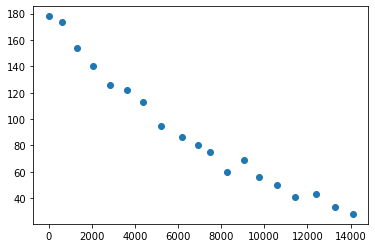

In [4]:
x = X[:,0]
y = X[:,1]
plt.scatter(x,y)

In [5]:
unos = np.ones(len(x))
At = np.array([unos, x])
A = np.transpose(At)
# Ecuaciones Normales
AtA = np.dot(At, A)
Aty = np.dot(At, y)
coef = np.linalg.solve(AtA, Aty)
alfa=coef[0]
beta=coef[1]
print("alfa",coef[0],"beta=",coef[1]) # alfa* , beta*

alfa 162.349798754359 beta= -0.01051058414768677


Debo ajustar a un polinomio lineal  𝑝  de la forma  𝑦=𝛼+𝛽𝑥

Polinomio lineal:  
-0.01051 x + 162.3


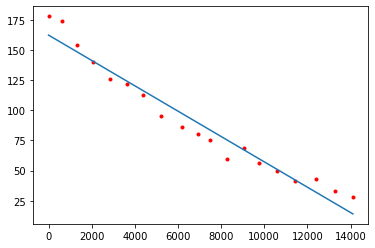

In [6]:
c = np.flipud(coef) #Lo doy vuelta porque sino no da bien
p = np.poly1d(c)
print("Polinomio lineal:",p)
plt.plot(x,y,'.r')
y_plt = np.polyval(p,x)
plt.plot(x,y_plt)

El ajuste por un polinomio lineal es relativamente bueno, se observa que los datos no se alejan mucho de la recta.

Ajusto los datos con una funcion del tipo f(x) = ae^(bx) utilizando
cuadrados minimos ordinarios, y calculo el error

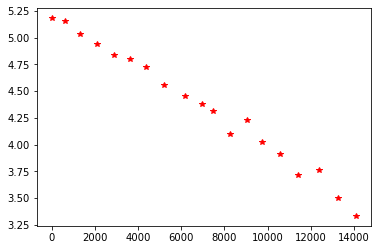

In [7]:
z = np.log(y)
plt.plot(x,z,'r*')

In [8]:
unos = np.ones(len(x))
At = np.array([unos, x])
A = np.transpose(At)
# Ecuaciones Normales
AtA = np.dot(At, A)
Atz = np.dot(At, z)
coef_O = np.linalg.solve(AtA, Atz)
alfa_O=coef_O[0]
beta_O=coef_O[1]
print("alfa",coef_O[0],"beta=",coef_O[1]) # alfa* , beta*

alfa 5.231356635692732 beta= -0.0001268359898120327


Polinomio lineal de la transformacion exponencial:  
-0.0001268 x + 5.231


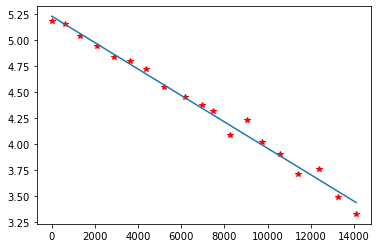

In [9]:
c_O = np.flipud(coef_O) #Lo doy vuelta porque sino no da bien
p_O = np.poly1d(c_O)
print("Polinomio lineal de la transformacion exponencial:",p_O)
plt.plot(x,z,'*r')
z_plt = np.polyval(p_O,x)
plt.plot(x,z_plt)

a= 187.0463852747064 b= -0.0001268359898120327


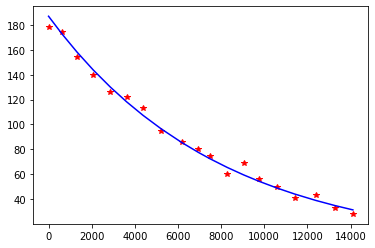

In [10]:
b=beta_O
a=np.exp(alfa_O)
print('a=',a,'b=',b)
y_plt_O=a*np.e**(b*x)
x_plt=np.linspace(0,15000,100)
y_plot_O=a*np.e**(b*x_plt)
plt.plot(x,y,'r*')
plt.plot(x,y_plt_O,'b')

In [12]:
# Calculo el error
Error_CMO = (y - a*np.e**(b*x))**2
print("El error cometido por cuadrados mínimos ordinarios es de",sum(Error_CMO))

El error cometido por cuadrados mínimos ordinarios es de 357.33289302336533


Repito el análisis anterior pero por Cuadrados Mínimos Generalizados (CMG):

In [13]:
z = np.log(y)
unos = np.ones(len(x))
At = np.array([unos, x])
A = np.transpose(At)

# Ecuaciones Normales
AtA = np.dot(At, A)
Atz = np.dot(At, z)

w=y**2
print(w)

[31684. 30276. 23716. 19600. 15876. 14884. 12769.  9025.  7396.  6400.
  5625.  3600.  4761.  3136.  2500.  1681.  1849.  1089.   784.]


In [14]:
W=np.diag(w)
AtWA = At@W@A
AtWz = At@W@z
coef_G = np.linalg.solve(AtWA, AtWz)
alfa_G=coef_G[0]
beta_G=coef_G[1]
print("alfa con pesos",coef_G[0],"beta con pesos=",coef_G[1])

alfa con pesos 5.207035589583903 beta con pesos= -0.0001208831619941256


Polinomio lineal de la transformacion exponencial por cuadrados mínimos generalizados:  
-0.0001209 x + 5.207


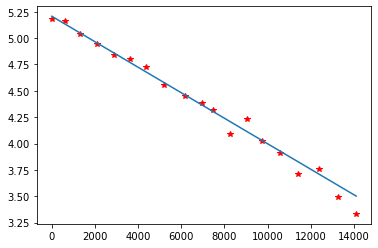

In [15]:
c_G = np.flipud(coef_G) #Lo doy vuelta porque sino no da bien
p_G = np.poly1d(c_G)
print("Polinomio lineal de la transformacion exponencial por cuadrados mínimos generalizados:",p_G)
plt.plot(x,z,'*r')
z_plt_G = np.polyval(p_G,x)
plt.plot(x,z_plt_G)

a generalizado= 182.55209595661833 b generalizado= -0.0001208831619941256


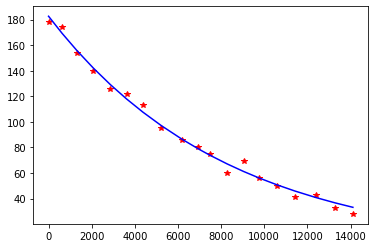

In [16]:
b_G=beta_G
a_G=np.exp(alfa_G)
print('a generalizado=',a_G,'b generalizado=',b_G)
y_plt_G=a_G*np.e**(b_G*x)
x_plt=np.linspace(0,15000,100)
y_plot_G=a_G*np.e**(b_G*x_plt)
plt.plot(x,y,'r*')
plt.plot(x,y_plt_G,'b')

In [17]:
# Calculo error por CMG
Error_CMG = (y - a_G*np.e**(b_G*x))**2
print("El error cometido por cuadrados mínimos generalizados es de",sum(Error_CMG))

El error cometido por cuadrados mínimos generalizados es de 295.6583161330731


El error cometido por Cuadrados Mínimos Generalizados es menor al error cometido por Cuadrados Mínimos Ordinarios.

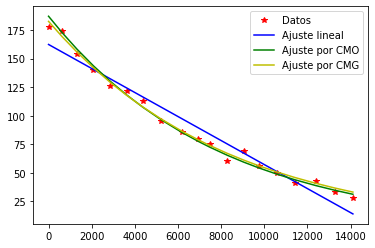

In [18]:
# Grafico los ajustes
plt.plot(x,y,"r*",label="Datos")
plt.plot(x,y_plt,"b",label="Ajuste lineal")
plt.plot(x,y_plt_O,"g",label="Ajuste por CMO")
plt.plot(x,y_plt_G,"y",label="Ajuste por CMG")
plt.legend()